In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv('espn_impressions.csv')
df.tail()

,start_time,household_impressions
6523,2017-12-31 22:45:00,71995
6524,2017-12-31 23:00:00,76233
6525,2017-12-31 23:15:00,77018
6526,2017-12-31 23:30:00,77797
6527,2017-12-31 23:45:00,70678


In [22]:
df_forecast = pd.read_csv('espn_impressions_forecast.csv')
df_forecast.tail()

,create_date,forecast_date,data_source_marker,network_id,master_network_id,timeslot,impression_type,forecast_impressions
667,2018-02-28,2018-01-07,R,33,NaN,92,H,253099
668,2018-02-28,2018-01-07,R,33,NaN,93,H,243932
669,2018-02-28,2018-01-07,R,33,NaN,94,H,238569
670,2018-02-28,2018-01-07,R,33,NaN,95,H,233875
671,2018-02-28,2018-01-07,R,33,NaN,96,H,236116


In [8]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [10]:
df_forecast['forecast_date'] = pd.to_datetime(df_forecast['forecast_date'])

In [20]:
mask = (df['start_time'] >= '2018-01-01 00:00:00')
df = df.loc[mask]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 2 columns):
start_time               0 non-null datetime64[ns]
household_impressions    0 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 0.0 bytes


In [23]:
import mysql.connector

cnx = mysql.connector.connect(user='ymdsmaster', password='YieLDMgMt36',
                              host='yieldmanagement.c2jaydssljuc.us-west-2.rds.amazonaws.com', port = 6174,
                              database='yieldmanagement')

cursor = cnx.cursor(buffered=True)
start_date = '2018-01-01'
end_date = '2018-01-07'
channel='ESPN'

query = (f"SELECT start_time, household_impressions, timeslot FROM yieldmanagement.rentrak_impressions where start_date BETWEEN '{start_date}' AND '{end_date}' AND network_label IN ('{channel}') ORDER BY network_label, start_time;")

cursor.execute(query)
data = pd.DataFrame(cursor.fetchall(), columns=['start_time', 'household_impressions', 'timeslot'])

cursor.close()

data.head()

,start_time,household_impressions,timeslot
0,2018-01-01 00:00:00,71197,1
1,2018-01-01 00:15:00,74954,2
2,2018-01-01 00:30:00,73637,3
3,2018-01-01 00:45:00,68800,4
4,2018-01-01 01:00:00,69261,5


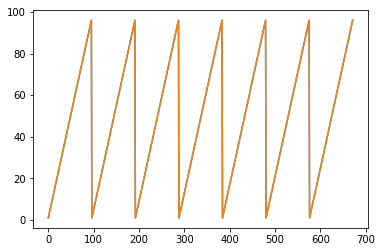

In [28]:
plt.plot(data['timeslot'])
plt.plot(df_forecast['timeslot'])

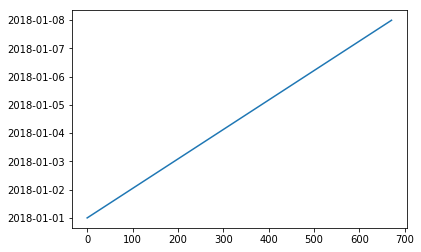

In [34]:
plt.plot(data['start_time'])

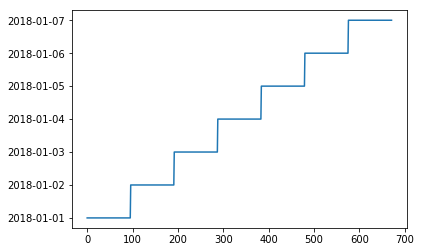

In [35]:
plt.plot(df_forecast['forecast_date'])

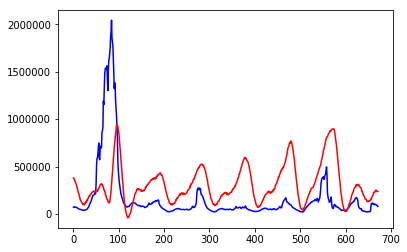

In [37]:
plt.plot(data['household_impressions'], color='blue')
plt.plot(df_forecast['forecast_impressions'], color='red')

In [43]:
df_forecast_9_4 = df_forecast[df_forecast['timeslot'] > 36 and df_forecast['timeslot'] < 64]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
df_error = pd.DataFrame()
df_error['error'] = abs(data['household_impressions'] - df_forecast['forecast_impressions'])
df_error['time'] = data['start_time']
df_error['abs_percent_error'] = df_error['error'] / data['household_impressions'] * 100
df_error['actual_percent_error'] = (data['household_impressions'] - df_forecast['forecast_impressions']) / data['household_impressions'] * 100

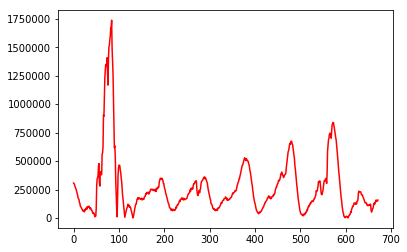

In [48]:
plt.plot(df_error['error'], color='red')

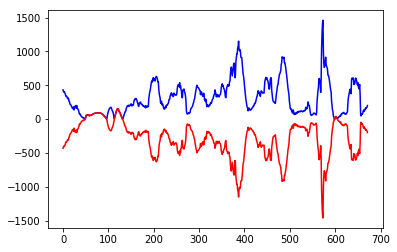

In [49]:
plt.plot(df_error['abs_percent_error'], color='blue')
plt.plot(df_error['actual_percent_error'], color='red')

In [51]:
avg_abs_percent_error = df_error['abs_percent_error'].mean()
print('avg_abs_percent_error',avg_abs_percent_error)

avg_abs_percent_error 308.9679013430027
